In [10]:
import pandas as pd
from scipy.ndimage import label
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
df = pd.read_csv("./data/c1.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)

In [15]:
diff = df['Consumption'].diff().dropna()

<Figure size 1000x600 with 0 Axes>

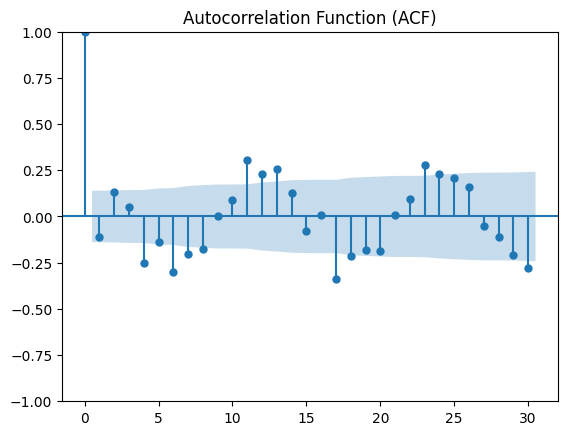

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plot_acf(diff, lags=30)
plt.title("Autocorrelation Function (ACF)")
plt.show()


<Figure size 1000x600 with 0 Axes>

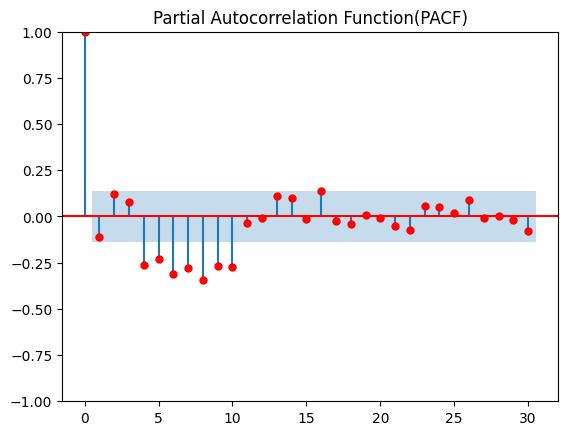

In [21]:
plt.figure(figsize=(10, 6))
plot_pacf(diff, lags=30, color='red')
plt.title("Partial Autocorrelation Function(PACF)")
plt.show()

In [31]:
df = pd.read_csv("./data/c2.csv", parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

y = df['Close'].dropna()

Date
2006-01-03    34.44
2006-01-04    34.18
2006-01-05    34.90
2006-01-06    35.46
2006-01-09    33.47
Name: Close, dtype: float64

In [48]:
size = int(len(y) * 0.8)

train = y[:size]
test = y[size:]

Date
2006-08-15    40.06
2006-08-16    41.56
2006-08-17    41.16
2006-08-18    40.22
2006-08-21    41.45
2006-08-22    40.72
2006-08-23    41.26
2006-08-24    41.86
2006-08-25    40.65
2006-08-28    40.03
2006-08-29    40.31
2006-08-30    40.58
2006-08-31    41.45
2006-09-01    41.54
2006-09-04    42.02
2006-09-05    41.22
2006-09-06    41.43
2006-09-07    42.06
2006-09-08    41.87
2006-09-11    42.50
2006-09-12    41.28
2006-09-13    40.52
2006-09-14    39.82
2006-09-15    41.44
2006-09-18    40.96
2006-09-19    41.93
2006-09-20    41.90
2006-09-21    42.22
2006-09-22    41.43
2006-09-25    40.46
2006-09-26    41.01
2006-09-27    42.39
2006-09-28    41.32
2006-09-29    41.74
2006-10-02    42.37
2006-10-03    41.88
2006-10-04    40.66
2006-10-05    42.55
2006-10-06    41.95
2006-10-09    41.81
Name: Close, dtype: float64

In [64]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(2, 1, 2))
result = model.fit()

forecast = result.forecast(steps=len(test))

D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\ML_College\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


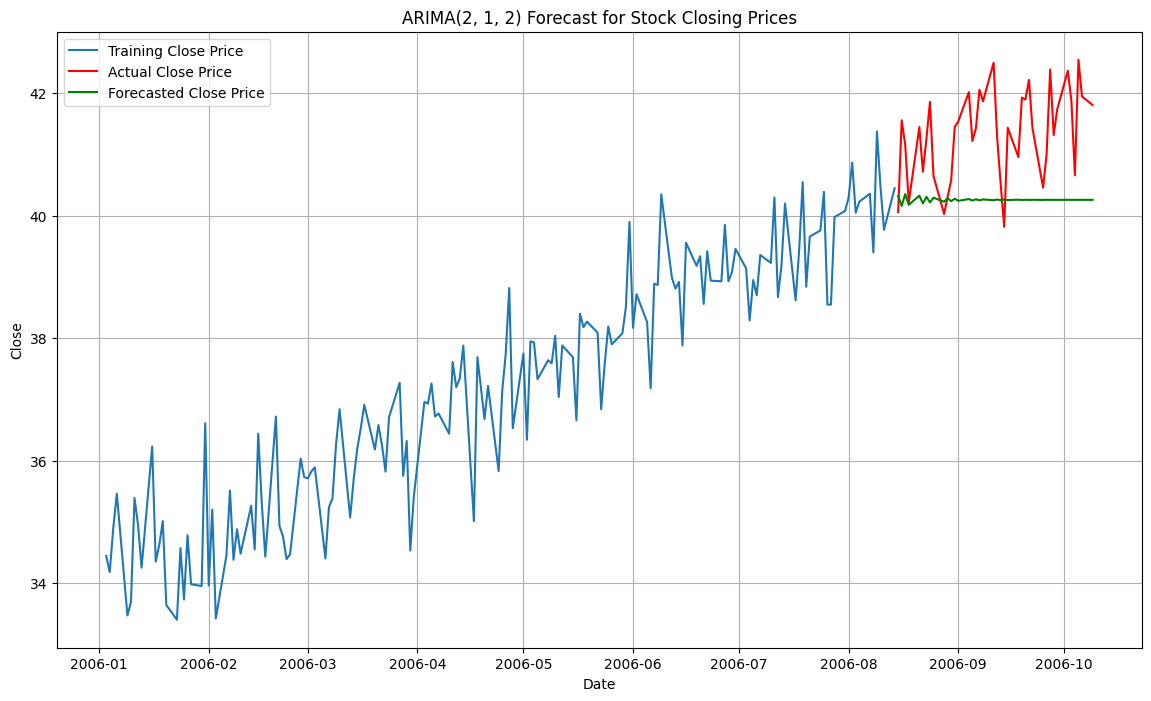

In [70]:
plt.figure(figsize=(14, 8))
plt.plot(train, label='Training Close Price')
plt.plot(test, color='red', label='Actual Close Price')
plt.plot(forecast, color='green', label='Forecasted Close Price')
plt.title("ARIMA(2, 1, 2) Forecast for Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid()
plt.show()